In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# checking null values

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
df['bmi'].mean()

28.893236911794673

In [9]:
df['bmi'].isnull().sum()

201

In [10]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Dropping the irrelevant columns

In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4632,12812,Female,53.0,0,0,Yes,Private,Rural,102.00,32.4,never smoked,0
751,25595,Female,58.0,1,0,Yes,Private,Urban,85.83,44.0,formerly smoked,0
4488,5170,Male,42.0,0,0,Yes,Govt_job,Rural,67.97,23.8,Unknown,0
953,13622,Male,6.0,0,0,No,children,Rural,92.98,18.9,Unknown,0
1054,4842,Female,76.0,0,0,No,Self-employed,Urban,77.52,40.9,formerly smoked,0


In [14]:
df.drop(['id'],axis=1,inplace=True)

In [15]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1211,Female,79.0,0,0,Yes,Private,Rural,90.77,22.5,never smoked,0
2208,Female,66.0,0,0,Yes,Govt_job,Rural,152.02,44.2,formerly smoked,0
2521,Male,73.0,0,1,Yes,Private,Rural,62.44,25.2,smokes,0
2010,Female,78.0,0,0,Yes,Private,Rural,95.37,17.3,Unknown,0
2280,Male,73.0,0,0,Yes,Self-employed,Rural,101.25,29.4,formerly smoked,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Handling The Special Character if present 

In [17]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3693,Male,38.0,0,0,No,Private,Rural,162.72,31.9,smokes,0
5055,Female,25.0,0,0,No,Private,Urban,92.06,25.3,smokes,0
4917,Male,23.0,0,0,No,Private,Rural,110.23,39.1,Unknown,0
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
690,Female,42.0,0,0,Yes,Self-employed,Urban,140.08,43.0,never smoked,0


In [18]:
#NONE

# Unique elements in each attributes

In [19]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

# Data Visualization of participants use to detect stroke

<AxesSubplot:ylabel='None'>

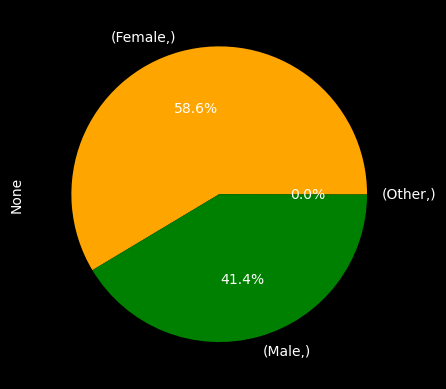

In [20]:
df[['gender']].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['orange','g'])


In [21]:
df[['gender']].value_counts()

gender
Female    2994
Male      2115
Other        1
dtype: int64

# Age Distribution and statisticsl summery

<Figure size 2500x2000 with 0 Axes>

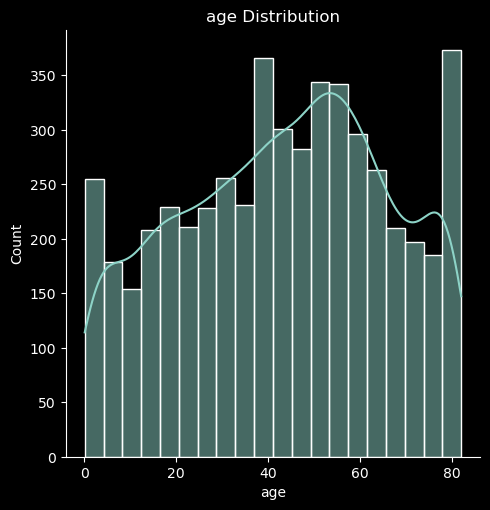

In [22]:
plt.figure(figsize=(25,20))
sns.displot(data=df,x='age',kde=True,fill=True)
plt.title("age Distribution")
plt.show()

In [23]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [24]:
df.groupby('gender')['age'].max()

gender
Female    82.0
Male      82.0
Other     26.0
Name: age, dtype: float64

In [25]:
bins = [0,10, 20,30, 40,50,60,100]
labels = ['0-10', '10-20', '20-30', '30-40','40-50','50-60','70+']

# create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)


In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70+
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,70+
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,70+
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,40-50
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,70+


# count of age in the data set

<AxesSubplot:>

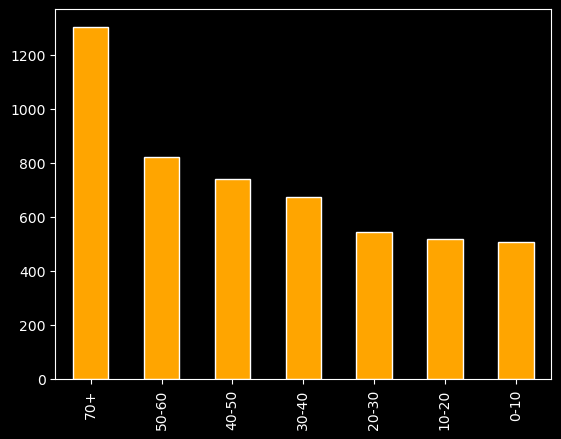

In [27]:
df['age_range'].value_counts().plot(kind='bar',color='Orange',edgecolor='white')

# age wrt gender

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


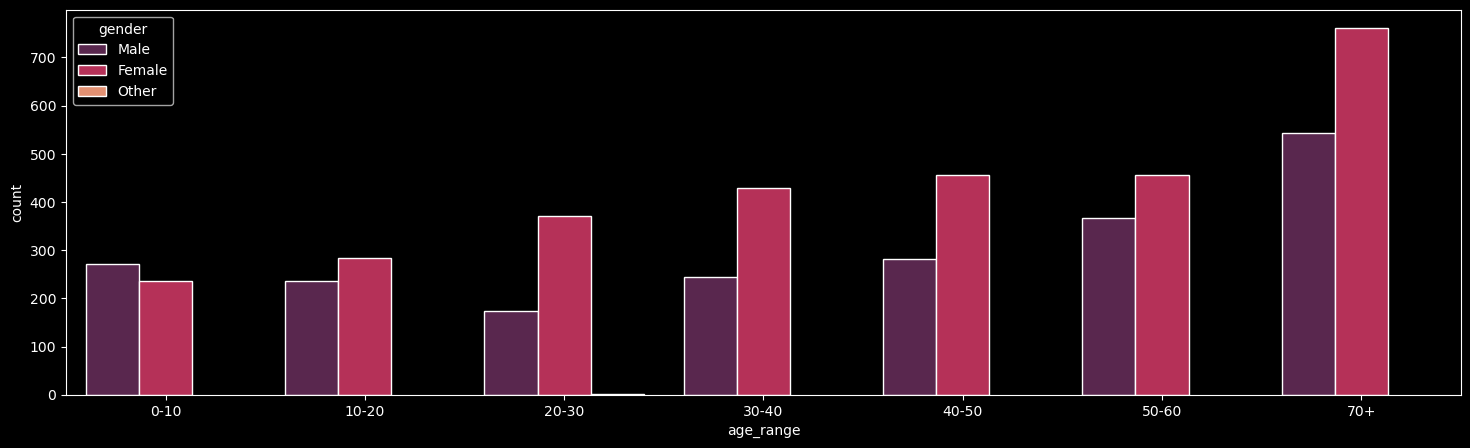

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(df['age_range'],hue=df['gender'],palette='rocket',edgecolor='white')
plt.show()

# age wrt stroke

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


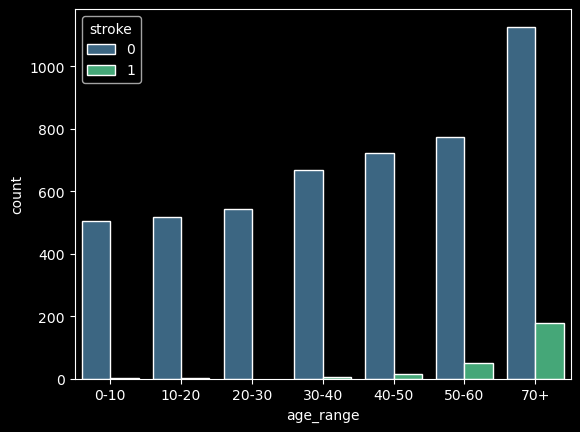

In [29]:

sns.countplot(df['age_range'],hue=df['stroke'],palette='viridis',edgecolor='white')
plt.show()

<Figure size 4000x4000 with 0 Axes>

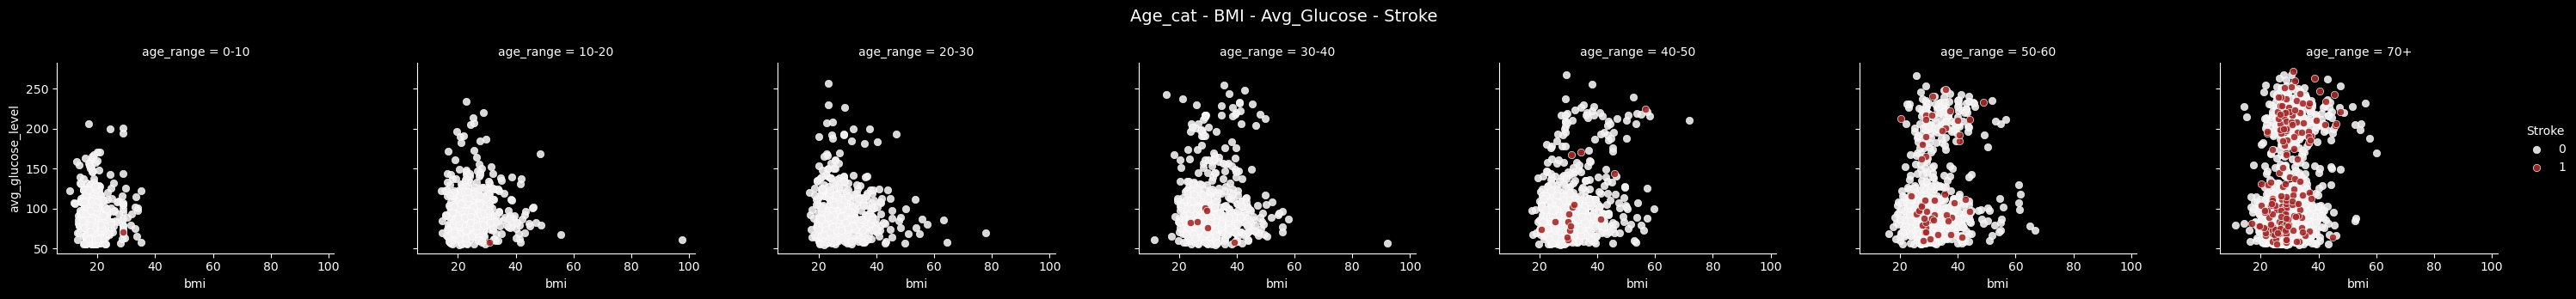

In [30]:
plt.figure(figsize=(40,40))
g = sns.FacetGrid(df, col="age_range", hue='stroke', 
                  col_order=['0-10', '10-20', '20-30', '30-40','40-50','50-60','70+'], hue_order=[0,1],
                  aspect=1.2, height=3.5, palette=sns.light_palette('brown', 2))
g.map(plt.scatter, "bmi", "avg_glucose_level", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
    
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Age_cat - BMI - Avg_Glucose - Stroke', fontsize=14)
l = g.add_legend(title='Stroke')

# gender wrt stroke

In [31]:
df.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='gender,stroke'>

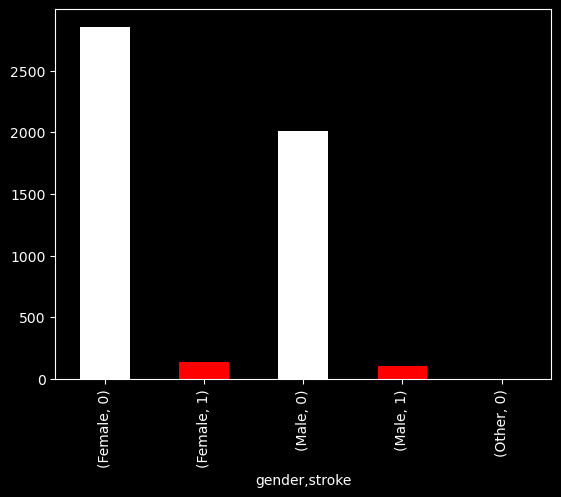

In [32]:
df.groupby('gender')['stroke'].value_counts().plot(kind='bar',color=['w','r'])

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


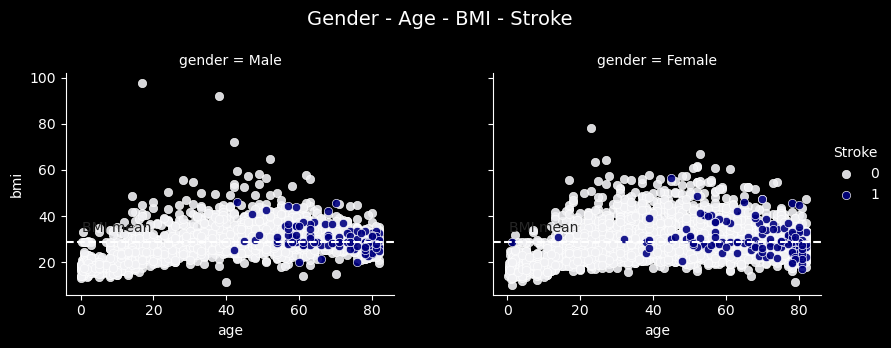

In [33]:
g = sns.FacetGrid(df, col="gender", hue='stroke', 
                  col_order=['Male', 'Female'], hue_order=[0,1],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 2))
g.map(plt.scatter, "age", "bmi", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(28.61, ls='--')
    ax2.axhline(28.61, ls='--')
    ax1.text(0.5,33, "BMI mean")
    ax2.text(0.5,33, "BMI mean")

fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Gender - Age - BMI - Stroke', fontsize=14)
l = g.add_legend(title='Stroke')


# age and gender wrt hypertension

<AxesSubplot:xlabel='hypertension', ylabel='age'>

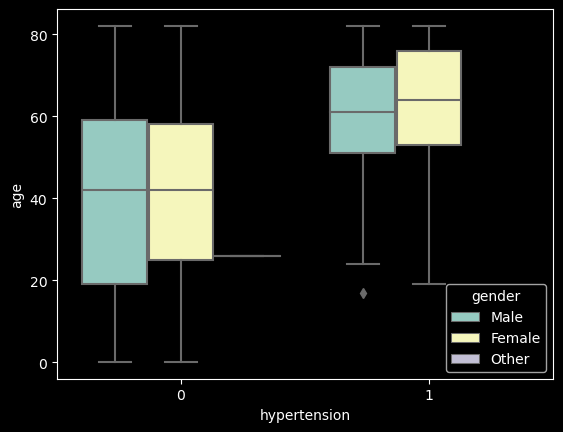

In [34]:
sns.boxplot(data=df,x='hypertension',y='age',hue='gender')

# Heart Disease

In [35]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
1809,Male,13.0,0,0,No,Private,Rural,99.44,21.0,never smoked,0,10-20


In [36]:
df.groupby('gender')['heart_disease'].value_counts()

gender  heart_disease
Female  0                2881
        1                 113
Male    0                1952
        1                 163
Other   0                   1
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='gender,heart_disease'>

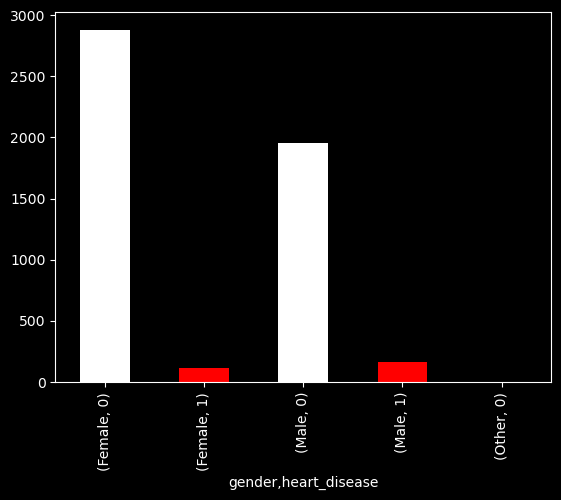

In [37]:
df.groupby('gender')['heart_disease'].value_counts().plot(kind='bar',color=['w','r'])

#  heart_disease relation with stoke

<AxesSubplot:xlabel='stroke,heart_disease'>

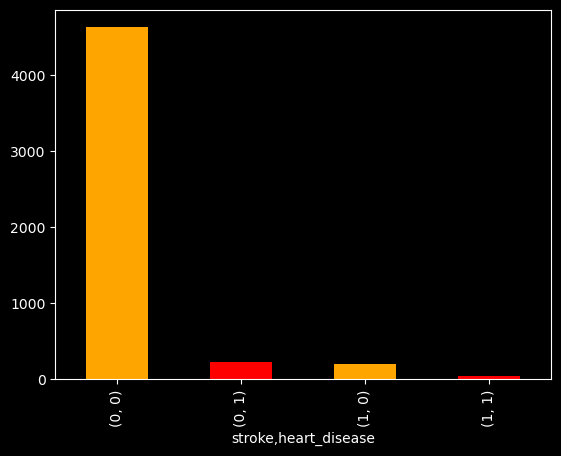

In [38]:
df.groupby('stroke')['heart_disease'].value_counts().plot(kind='bar',color=['orange','r'])

# impact of marital status on stroke

In [39]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
1972,Female,39.0,0,0,Yes,Private,Urban,122.91,35.7,never smoked,0,30-40
256,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,70+
1711,Female,52.0,1,0,Yes,Private,Rural,213.54,32.0,never smoked,0,50-60
1111,Female,18.0,0,0,No,Private,Rural,98.10,21.8,never smoked,0,10-20
1961,Female,53.0,0,0,Yes,Self-employed,Urban,84.85,24.7,never smoked,0,50-60


/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


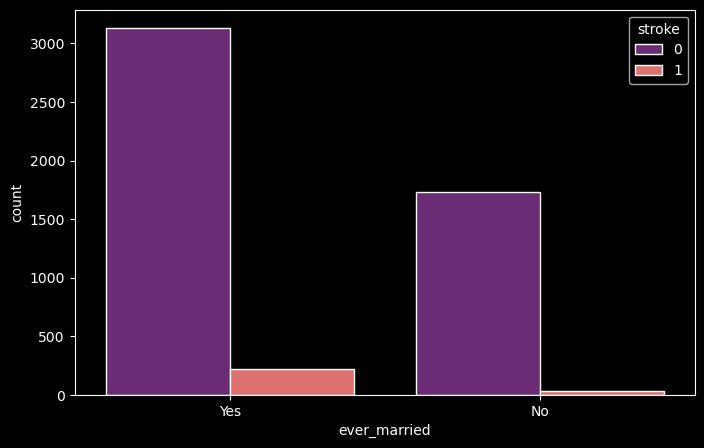

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(df['ever_married'],hue=df['stroke'],palette='magma',edgecolor='white')
plt.show()

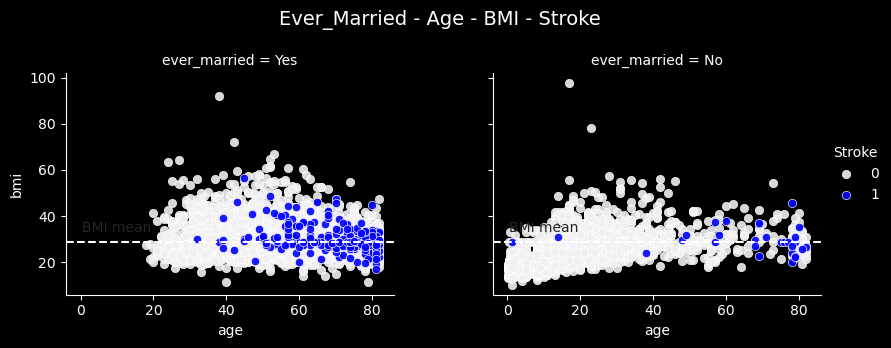

In [41]:
g = sns.FacetGrid(df, col="ever_married", hue='stroke', 
                  col_order=['Yes', 'No'], hue_order=[0,1],
                  aspect=1.2, height=3.5, palette=sns.light_palette('b', 2))
g.map(plt.scatter, "age", "bmi", alpha=0.9, 
      edgecolor='white', linewidth=0.5)

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(28.61, ls='--')
    ax2.axhline(28.61, ls='--')
    ax1.text(0.5,33, "BMI mean")
    ax2.text(0.5,33, "BMI mean")

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Ever_Married - Age - BMI - Stroke', fontsize=14)
l = g.add_legend(title='Stroke')

# impact of work_type on stroke

<AxesSubplot:xlabel='work_type', ylabel='count'>

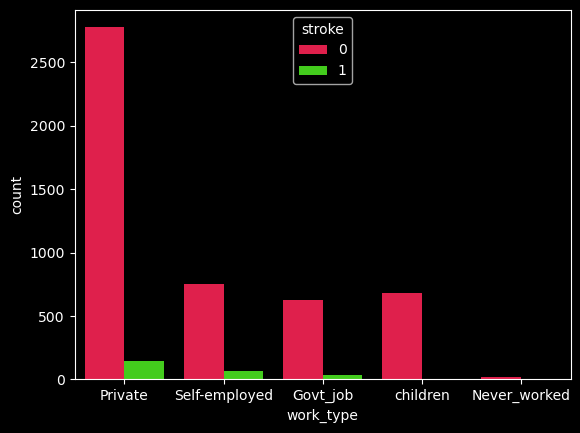

In [42]:
sns.countplot(data=df,x='work_type',hue='stroke',palette='prism_r')

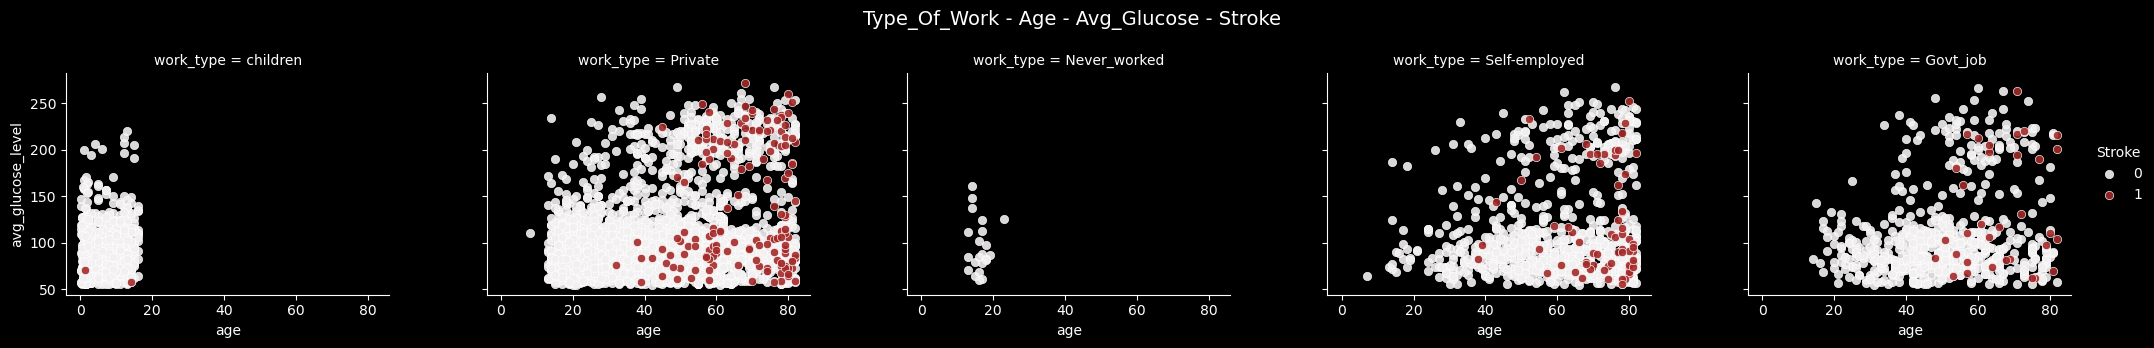

In [43]:
g = sns.FacetGrid(df, col="work_type", hue='stroke', 
                  col_order=['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'], hue_order=[0,1],
                  aspect=1.2, height=3.5, palette=sns.light_palette('brown', 2))
g.map(plt.scatter, "age", "avg_glucose_level", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
    
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Type_Of_Work - Age - Avg_Glucose - Stroke', fontsize=14)
l = g.add_legend(title='Stroke')


# impact of Residence_type on stroke

In [44]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
2060,Male,59.0,0,0,Yes,Private,Rural,93.90,42.2,never smoked,0,50-60
1511,Female,81.0,0,1,Yes,Private,Rural,123.49,30.7,smokes,0,70+
3505,Female,77.0,0,0,Yes,Self-employed,Urban,151.23,24.9,never smoked,0,70+
4689,Female,32.0,0,0,Yes,Private,Rural,102.87,26.6,smokes,0,30-40
2496,Female,54.0,0,0,Yes,Private,Rural,97.47,26.7,never smoked,0,50-60


<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

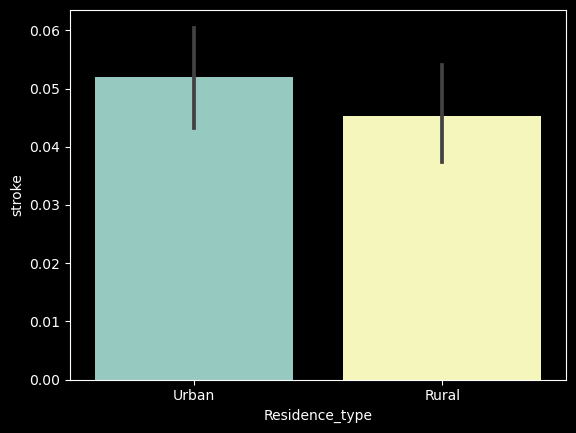

In [45]:
sns.barplot(data=df, x="Residence_type", y="stroke")

# impact of avg glucose_level on the stroke 

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

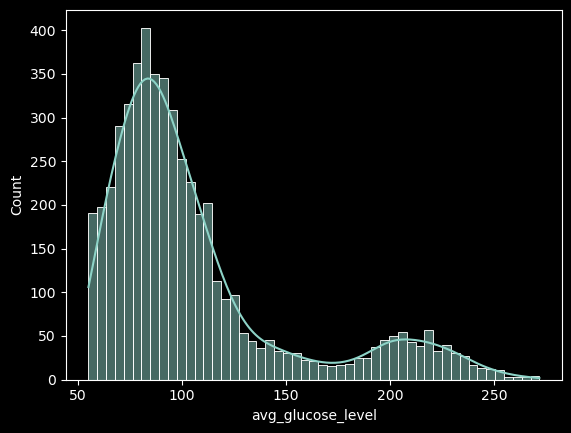

In [46]:
sns.histplot(df['avg_glucose_level'],kde=True)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

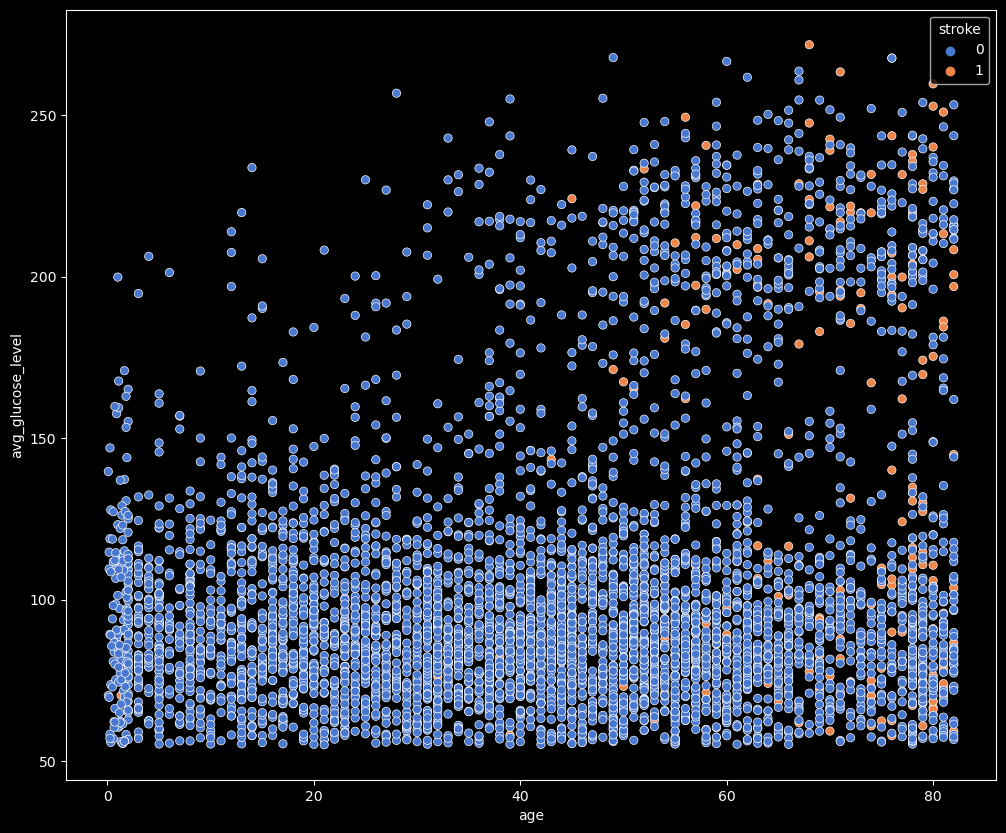

In [47]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='stroke',palette='muted')

# impact of bmi on stroke

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

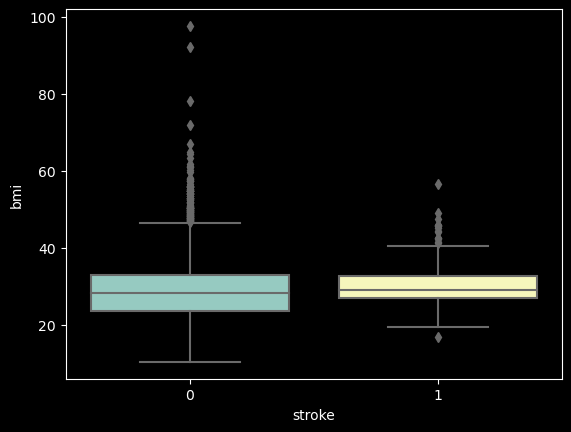

In [48]:
sns.boxplot(data=df,x='stroke',y='bmi')

# impact of smoking status on stroke

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

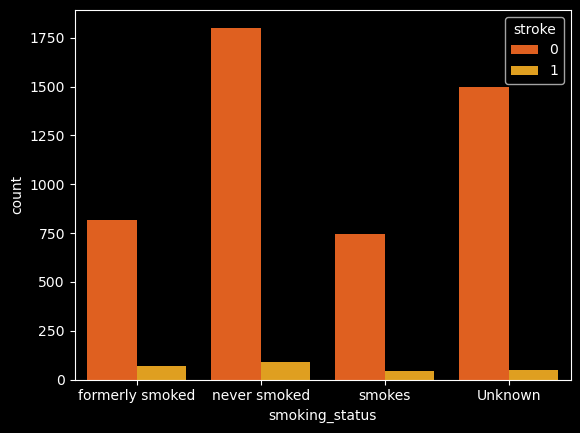

In [49]:
sns.countplot(data=df,x='smoking_status',hue='stroke',palette='autumn')

In [50]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
4174,Female,35.0,0,0,Yes,Self-employed,Urban,103.29,20.6,never smoked,0,30-40


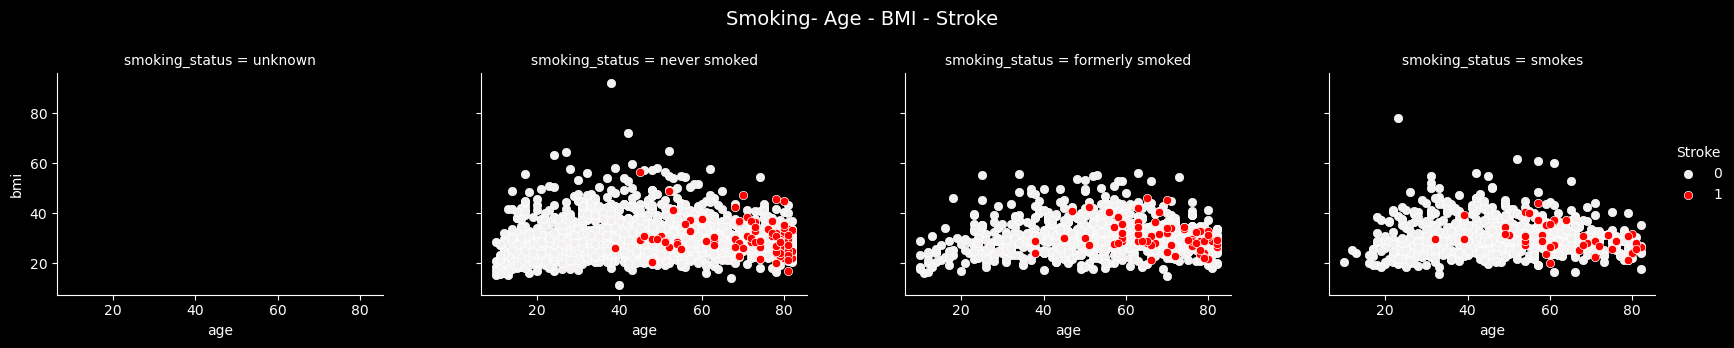

In [51]:
g = sns.FacetGrid(df, col="smoking_status", hue="stroke", 
                  col_order=['unknown','never smoked', 'formerly smoked', 'smokes'], hue_order=[0,1],
                  aspect=1.2, height=3.5, palette=sns.light_palette('r', 2))
g.map(plt.scatter, "age", "bmi", 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Smoking- Age - BMI - Stroke', fontsize=14)
l = g.add_legend(title='Stroke')


# cheking Corelations 

<AxesSubplot:>

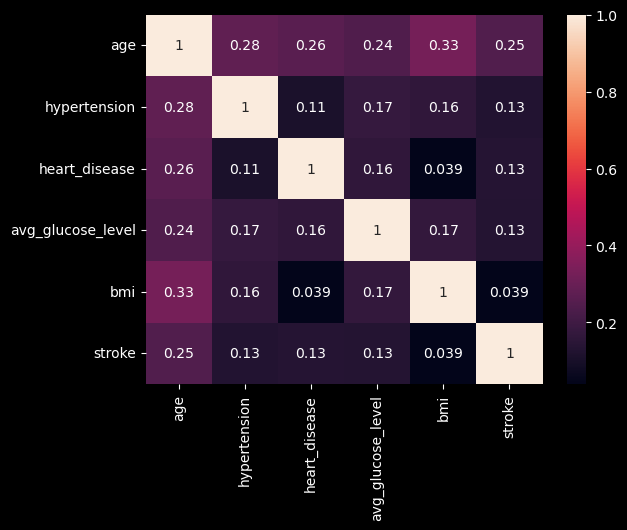

In [52]:
sns.heatmap(df.corr(),annot=True,linecolor='white')

# Convert Categorical variable into Numerical

In [53]:
df.nunique()


gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
age_range               7
dtype: int64

In [54]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_range'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
LE=LabelEncoder()

In [57]:
df['gender'] = LE.fit_transform(df['gender'])

In [58]:
df['ever_married'] = LE.fit_transform(df['ever_married'])

In [59]:
df['work_type'] = LE.fit_transform(df['work_type'])

In [60]:
df['Residence_type'] = LE.fit_transform(df['Residence_type'])

In [61]:
df['smoking_status'] = LE.fit_transform(df['smoking_status'])

In [62]:
df.drop('age_range',axis=1,inplace=True)

In [63]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

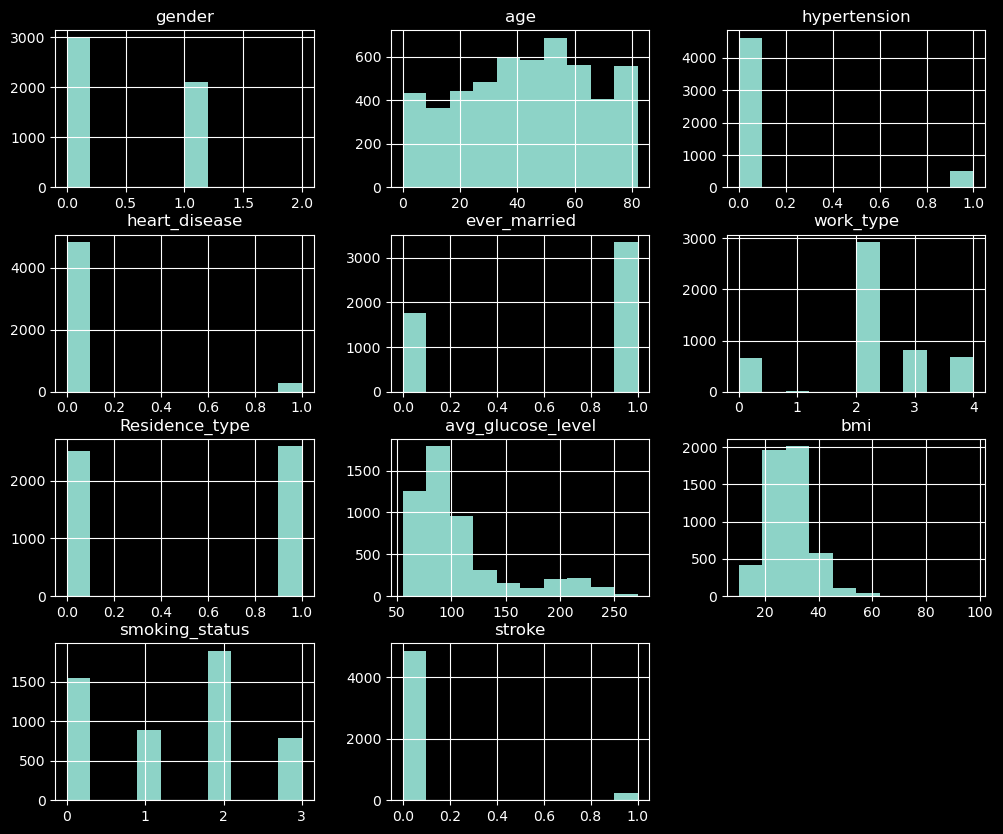

In [64]:
df.hist(figsize=(12,10))

# scaling and transformation

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:

SS=StandardScaler()

In [67]:
df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]=SS.fit_transform(df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',]])

In [68]:
from sklearn.preprocessing import PowerTransformer

In [69]:
PT=PowerTransformer()

In [70]:
df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]=PT.fit_transform(df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']])

In [71]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3526,0,1.652099,-0.328602,-0.238947,0,3,1,-0.849765,1.295607,0,0
2683,0,1.159767,-0.328602,-0.238947,1,2,0,-0.350864,-1.332056,0,0
4565,0,0.538656,-0.328602,-0.238947,1,3,1,0.189400,0.618209,1,0
1699,0,0.124393,-0.328602,-0.238947,1,0,0,0.501148,-0.082151,1,0
3106,0,0.352715,-0.328602,-0.238947,1,2,0,-0.982872,0.775445,0,0


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

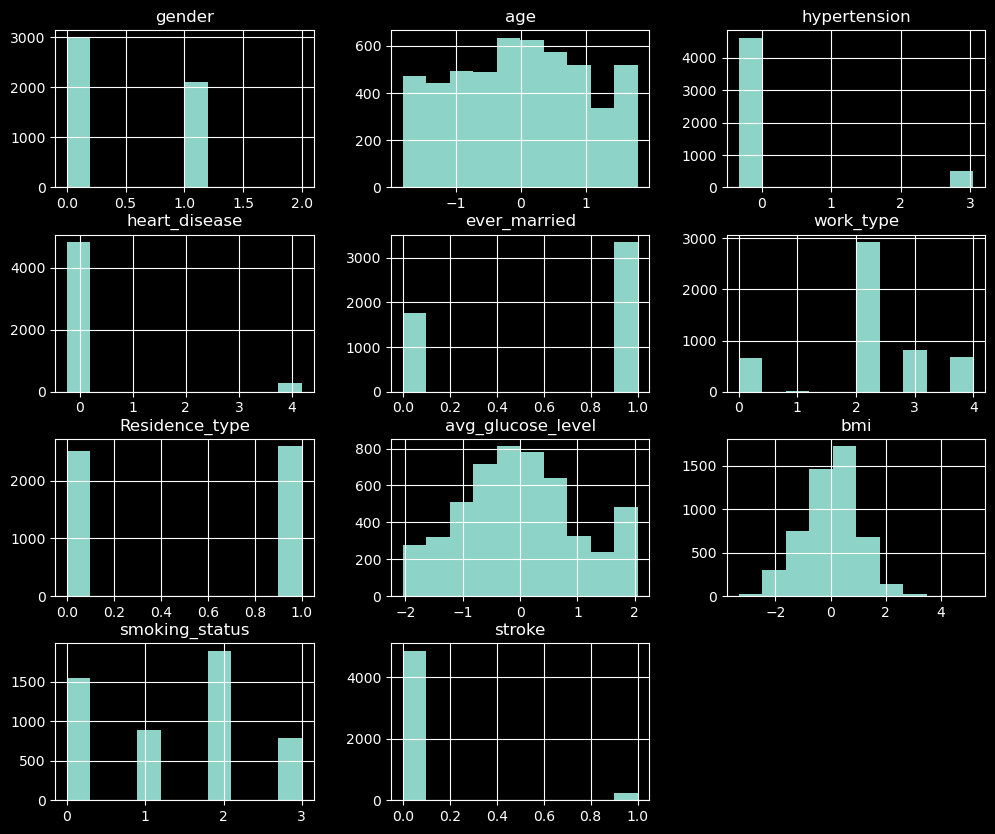

In [72]:
df.hist(figsize=(12,10))

# Splitting data into independent and dependent variables

In [73]:
X = df.drop("stroke",axis=1).values

In [74]:
y=df['stroke'].values

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [77]:
X_train.shape

(3577, 10)

In [78]:
X_test.shape

(1533, 10)

# Modeling

# LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
LR= LogisticRegression()

In [81]:
LR.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred=LR.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
accuracy_score(y_test,y_pred)

0.9530332681017613

In [85]:
confusion_matrix(y_test,y_pred)

array([[1461,    1],
       [  71,    0]])

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



# KNeighborclassifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier 

In [88]:
KNN=KNeighborsClassifier(n_neighbors=10, leaf_size=30)

In [89]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
y_pred1=KNN.predict(X_test)

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
accuracy_score(y_test,y_pred1)

0.9530332681017613

In [93]:
confusion_matrix(y_test,y_pred1)

array([[1461,    1],
       [  71,    0]])

In [94]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



# Decision Tree Classifier 

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DTC= DecisionTreeClassifier(random_state=0,max_depth=2)

In [97]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [98]:
y_pred2=DTC.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
accuracy_score(y_test,y_pred2)

0.9536855838225701

In [101]:
confusion_matrix(y_test,y_pred2)

array([[1462,    0],
       [  71,    0]])

In [102]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
RFC=RandomForestClassifier(n_estimators=100,max_depth=3)

In [105]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [106]:
y_pred3=RFC.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
accuracy_score(y_test,y_pred3)

0.9536855838225701

In [109]:
confusion_matrix(y_test,y_pred3)

array([[1462,    0],
       [  71,    0]])

In [110]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# GradientBoostingClassifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
GBC=GradientBoostingClassifier(learning_rate=0.01, max_depth=4,n_estimators=100)

In [113]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4)

In [114]:
y_pred4=GBC.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [116]:
accuracy_score(y_test,y_pred4)

0.9530332681017613

In [117]:
confusion_matrix(y_test,y_pred3)

array([[1462,    0],
       [  71,    0]])

In [118]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Tuning Random Forest Classifier Hyperparameters

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {'criterion' : ["gini", "entropy"],
              'n_estimators':[100,200,300],
              'max_depth': [3,5,4,5,6,7,8,9,10]}

In [121]:
RFC=RandomForestClassifier()

In [122]:
grid_search = GridSearchCV(RFC, param_grid, cv=5)

In [123]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300]})

In [124]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
0.9512720156555773
